In [1]:
import pandas as pd
from textblob import TextBlob

In [2]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize word frequencies using wordcloud

In [3]:
word_frequencies = {'Python':100, 'R': 50, 'Excel': 25, 'SQL' : 25}

In [4]:
wc=WordCloud(max_font_size=50, max_words=100, background_color="white")

(-0.5, 399.5, 199.5, -0.5)

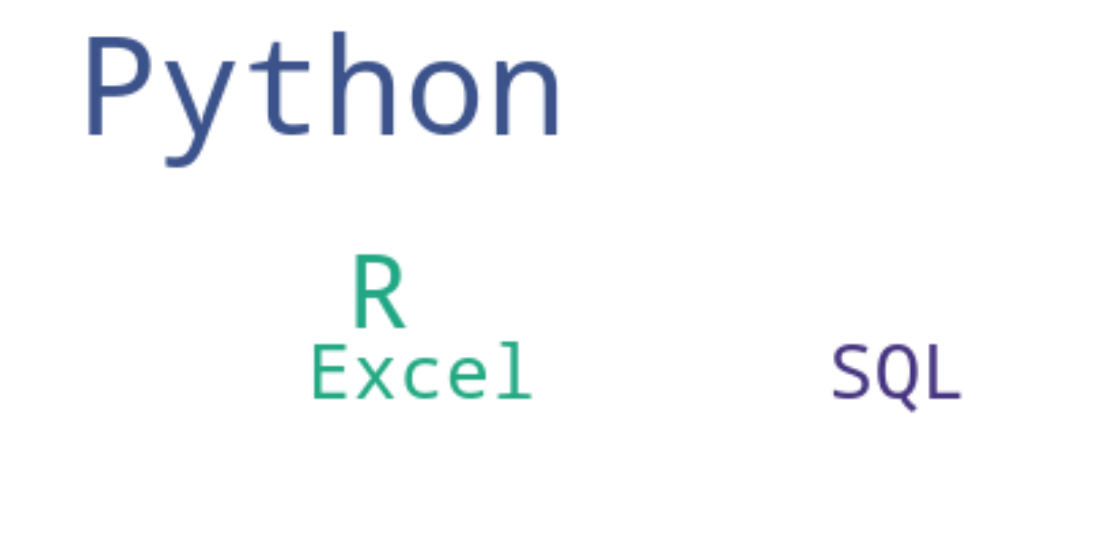

In [5]:
wc.generate_from_frequencies(word_frequencies)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

# We would like to use the same technique to visualize the earning calls

In [6]:
data = pd.read_csv('data/EC10.csv')
data.head()

,id,text,date,company,sector
0,32934,"Zoe's Kitchen, Inc. (NYSE:ZOES)\nQ2 2015 Earni...",2015-08-28 00:11:00,"Zoe's Kitchen, Inc.",Consumer Services
1,32905,"Autodesk, Inc. (NASDAQ:ADSK)\nQ2 2016 Earnings...",2015-08-28 00:07:00,"Autodesk, Inc.",Technology
2,32926,Smith & Wesson Holding Corp. (NASDAQ:SWHC)\nQ1...,2015-08-27 23:25:00,Smith & Wesson Holding Corporation,Capital Goods
3,32930,"Ulta Salon, Cosmetics & Fragrance, Inc. (NASDA...",2015-08-27 23:09:00,"Ulta Salon, Cosmetics & Fragrance, Inc.",Consumer Services
4,32907,Splunk Inc. (NASDAQ:SPLK)\nQ2 2016 Earnings Co...,2015-08-27 22:56:00,Splunk Inc.,Technology


In [11]:
def summarize(text, n=25):
    blob = TextBlob(text)
    nouns = [word for word, tag in blob.pos_tags if tag[0]=='N' and tag[-1]!='P']
    return pd.Series(nouns).value_counts()[:n].to_dict()

In [12]:
data['summary'] = data['text'].apply(summarize)

In [17]:
def word_cloud(word_frequencies):
    wc=WordCloud(max_font_size=50, max_words=100, background_color="white")
    wc.generate_from_frequencies(word_frequencies)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Zoe's Kitchen, Inc.


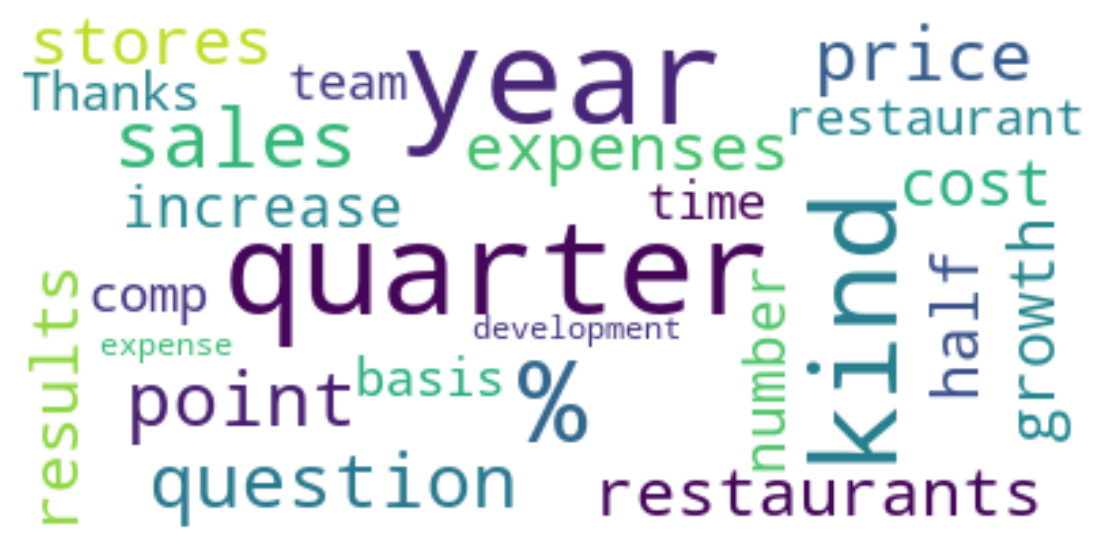

Autodesk, Inc.


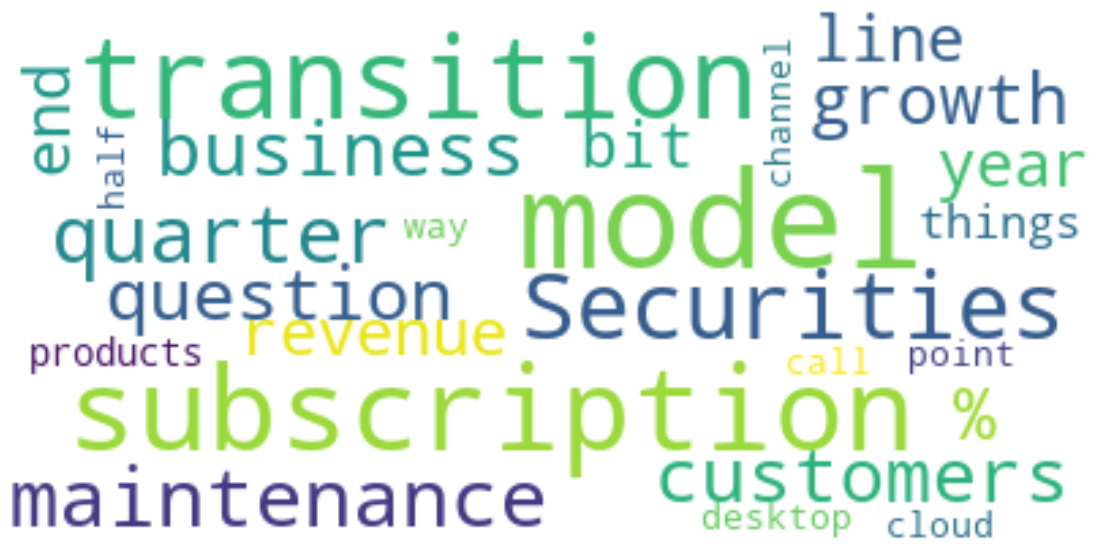

Smith & Wesson Holding Corporation


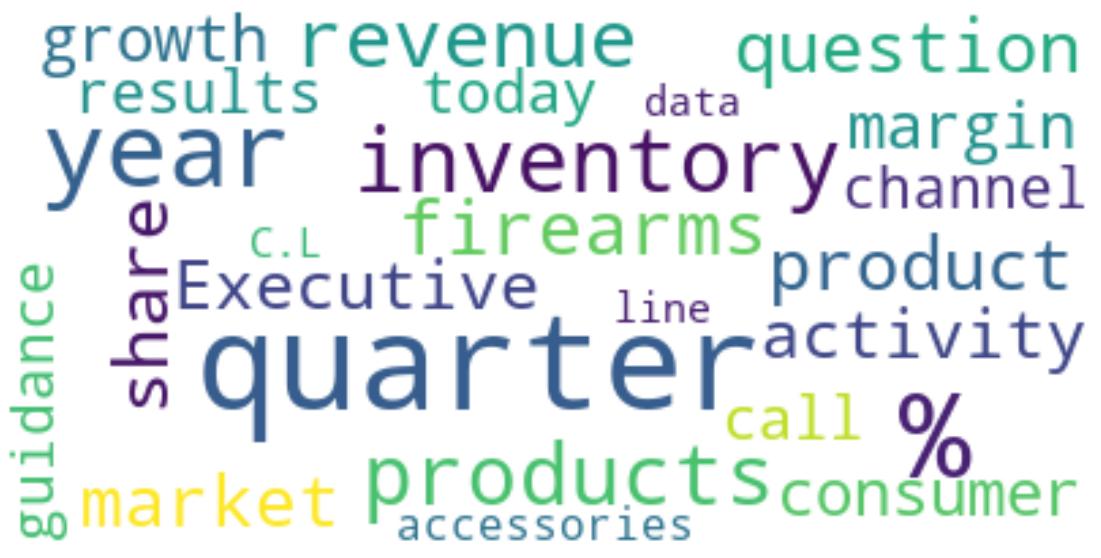

Ulta Salon, Cosmetics & Fragrance, Inc.


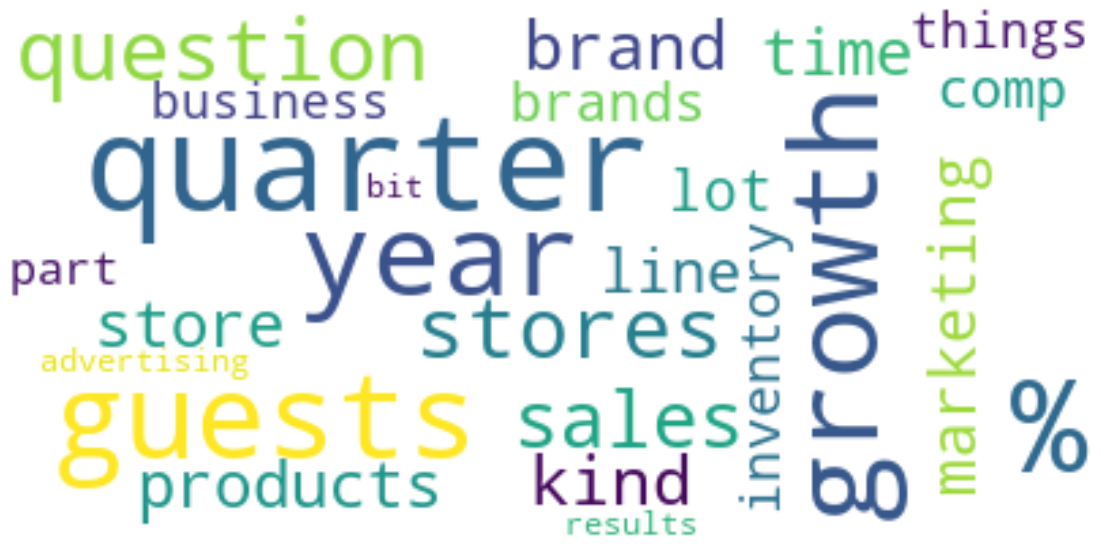

Splunk Inc.


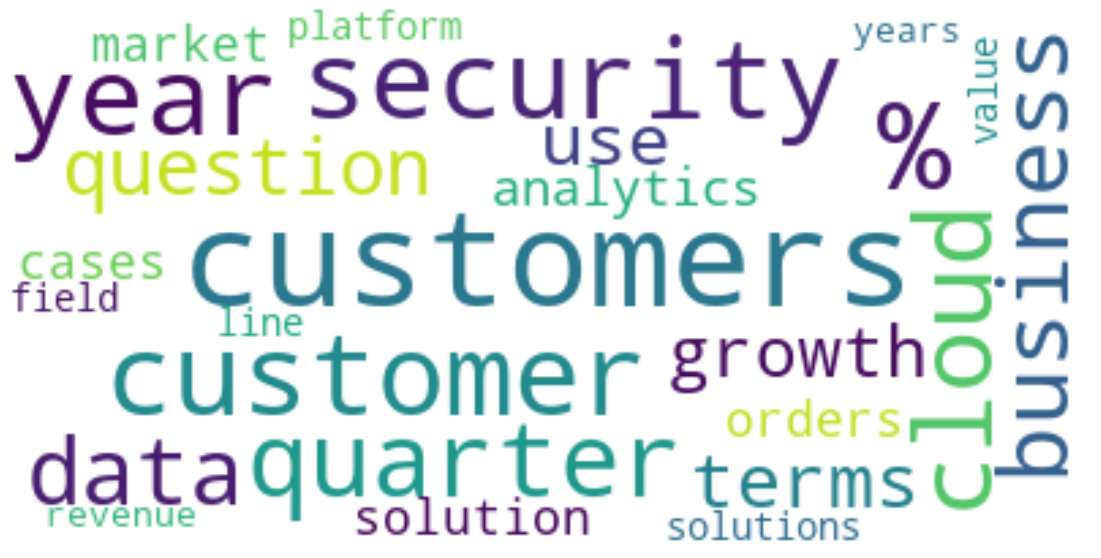

Gamestop Corporation


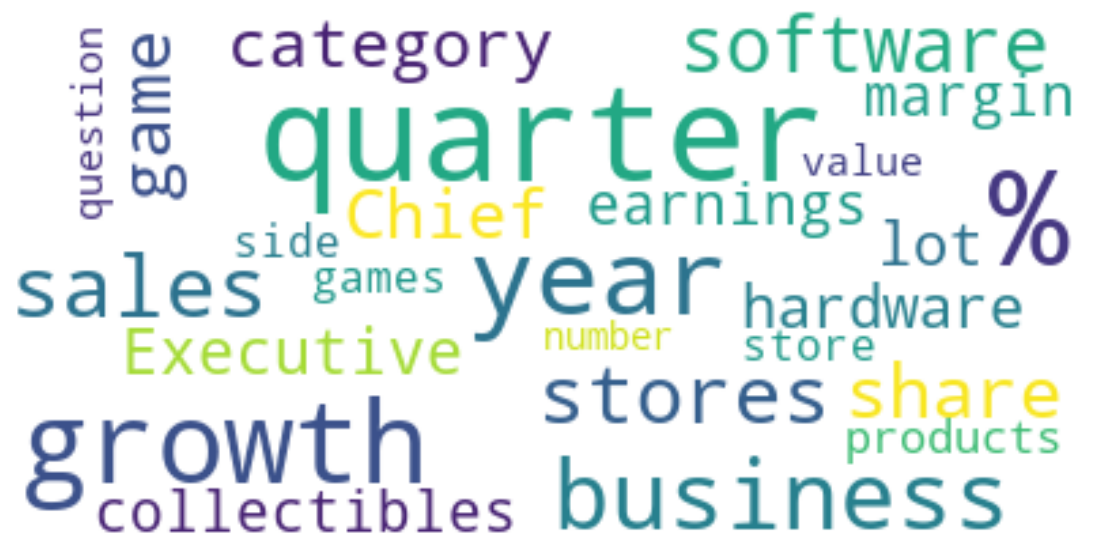

OmniVision Technologies, Inc.


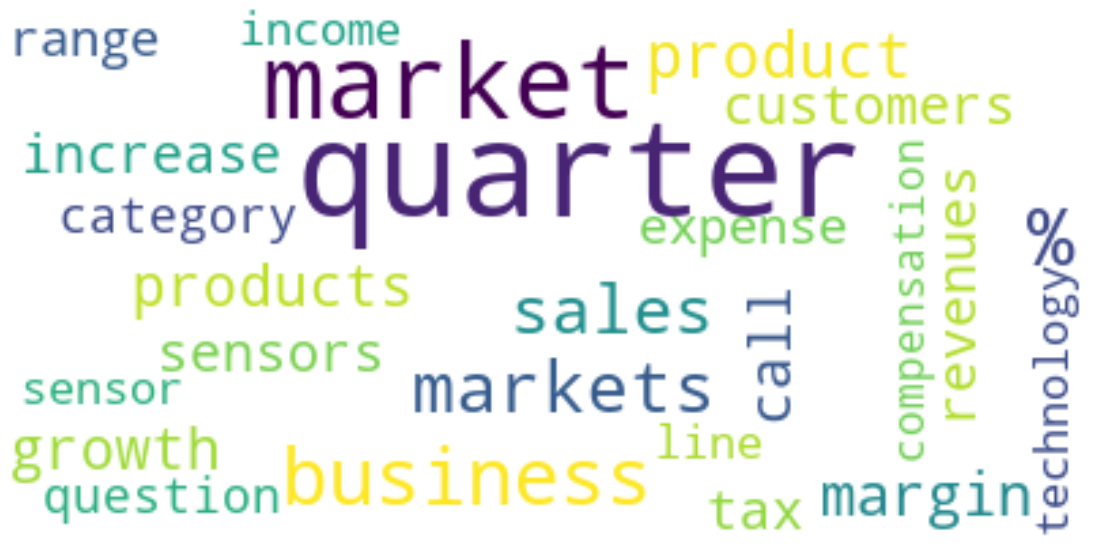

Toronto Dominion Bank (The)


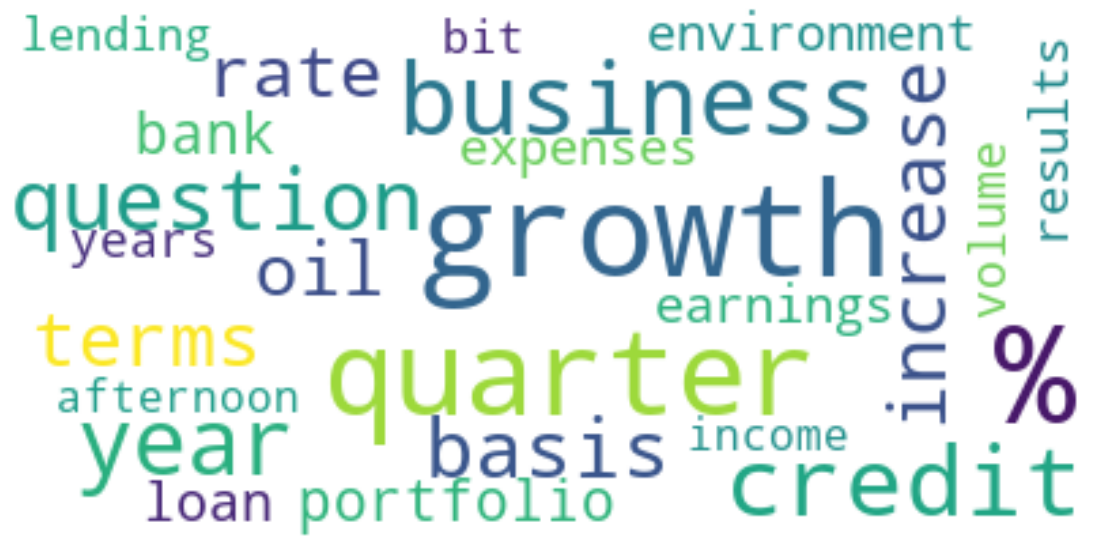

Books-A-Million, Inc.


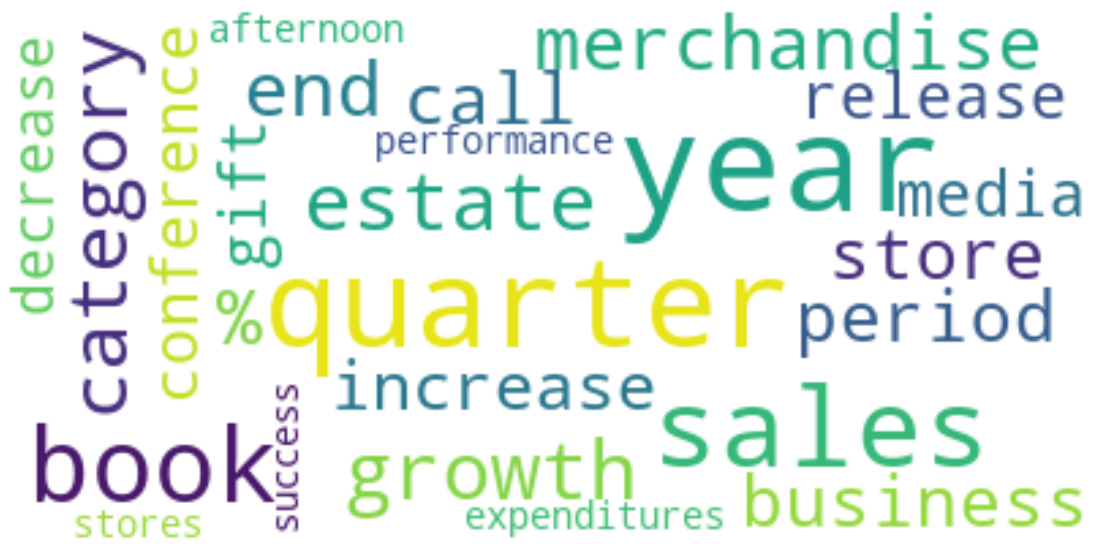

Veeva Systems Inc.


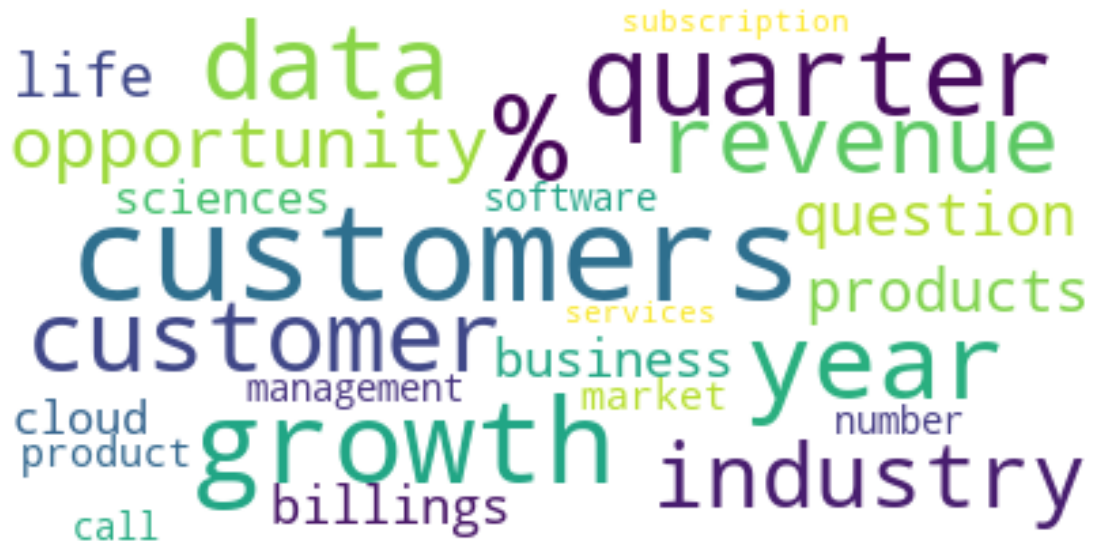

In [19]:
for i in data.index:
    company = data.loc[i, 'company']
    summary = data.loc[i, 'summary']
    print(company)
    word_cloud(summary)